# 1. 統計分析

In [12]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
plt.style.use('ggplot')

#pandas作圖不使用plt.show()，若要顯示在Jupyter Notebook上，需先執行以下程式碼：（%是直接在terminal中執行command line的意思）
%matplotlib inline

df = pd.DataFrame(np.random.rand(6,4),index=['bar1','bar2','bar3','bar4','bar5','bar6'],columns=['A','B','C','D'])
df

,A,B,C,D
bar1,0.761010,0.052393,0.712539,0.091386
bar2,0.958127,0.101772,0.358901,0.414820
bar3,0.774523,0.947510,0.873503,0.432880
bar4,0.574516,0.256979,0.621618,0.208354
bar5,0.202122,0.782834,0.471072,0.555870
bar6,0.257053,0.122883,0.590635,0.549589


## A. 描述性統計

In [13]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.587892,0.377395,0.604711,0.375483
std,0.303423,0.387371,0.180356,0.187797
min,0.202122,0.052393,0.358901,0.091386
25%,0.336419,0.107050,0.500963,0.259970
50%,0.667763,0.189931,0.606126,0.423850
75%,0.771145,0.651370,0.689809,0.520412
max,0.958127,0.947510,0.873503,0.555870


## B. 平均

In [14]:
df.mean()

A    0.587892
B    0.377395
C    0.604711
D    0.375483
dtype: float64

## C. 最大值

In [15]:
df.max()

A    0.958127
B    0.947510
C    0.873503
D    0.555870
dtype: float64

## D. 最小值

In [16]:
df.min()

A    0.202122
B    0.052393
C    0.358901
D    0.091386
dtype: float64

## E. 中位數

In [17]:
df.median()

A    0.667763
B    0.189931
C    0.606126
D    0.423850
dtype: float64

## F. 四分位數

In [19]:
df.quantile(0.75)

A    0.771145
B    0.651370
C    0.689809
D    0.520412
Name: 0.75, dtype: float64

## G. 總和

In [8]:
df.sum()

A    3.241157
B    3.150990
C    2.996651
D    3.201706
dtype: float64

## H. 標準差

In [9]:
df.std()

A    0.425401
B    0.293702
C    0.301694
D    0.416641
dtype: float64

## I. 變異數

In [10]:
df.var()

A    0.180966
B    0.086261
C    0.091020
D    0.173590
dtype: float64

## J. 幾何平均數 & 調和平均數（Scipy.stats）
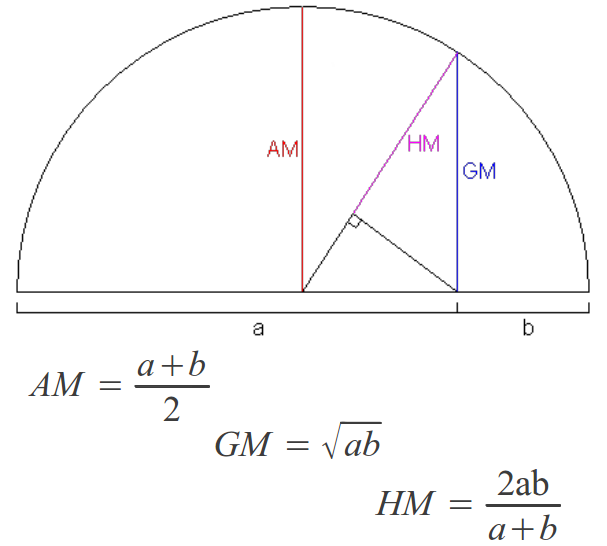

幾何平均數適⽤用於計算比率數據的變化率
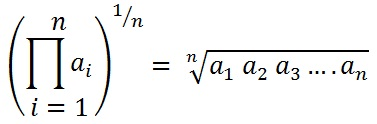

In [11]:
from scipy import stats
stats.gmean(df['A'])

0.29762737348590551

調和平均數


In [12]:
stats.hmean(df['A'])

0.093168984759069998

## K. 四分位數（Scipy.stats）

In [13]:
stats.mstats.mquantiles(df['A'])

array([ 0.13177989,  0.60908002,  0.89497277])

## L. 共變數（Covariance）

In [14]:
df.cov()

,A,B,C,D
A,0.180966,-0.009359,0.026863,0.051268
B,-0.009359,0.086261,-0.025619,-0.058048
C,0.026863,-0.025619,0.091020,0.020961
D,0.051268,-0.058048,0.020961,0.173590


## M. 機率密度

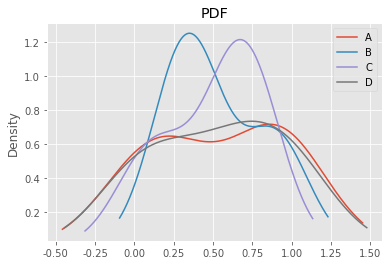

In [15]:
plt.rcParams['axes.unicode_minus']=False #正常顯示負號
df.plot(kind='kde',title="PDF")

## N. 峰度（Kurtosis）
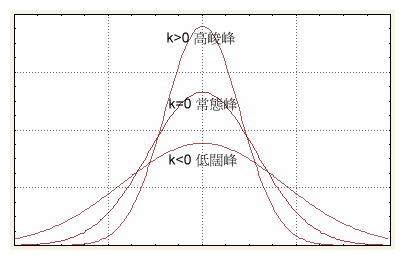

In [16]:
df.kurt()

A   -2.698907
B   -1.827707
C   -1.256066
D   -2.017190
dtype: float64

## O. 偏態（Skewness）

SK=0, 平均數=中位數
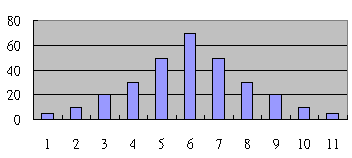
SK>0, 平均數>中位數 (右偏)
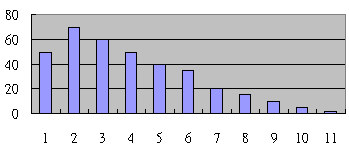
SK<0, 平均數<中位數 (左偏)
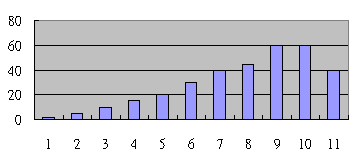

In [17]:
df.skew()

A   -0.192005
B    0.792103
C   -0.872427
D   -0.193596
dtype: float64

# 2. 異常值偵測

## A. 1.5 IQR

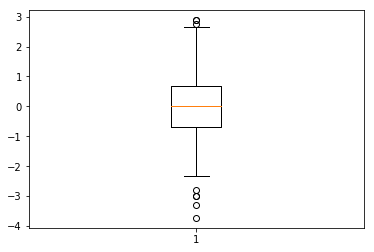

In [3]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

x = np.random.randn(1000)
r = plt.boxplot(x,showfliers=True) #show outliers
plt.show()

In [4]:
r

{'boxes': [<matplotlib.lines.Line2D at 0x11869f3c8>],
 'caps': [<matplotlib.lines.Line2D at 0x1186abda0>,
 'fliers': [<matplotlib.lines.Line2D at 0x1186b0fd0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1186b07b8>],
 'whiskers': [<matplotlib.lines.Line2D at 0x11869fd30>,
  <matplotlib.lines.Line2D at 0x11869ff28>]}

In [11]:
r['fliers'][0].get_data()[1]

array([-2.78400299, -3.72800494, -2.99185562, -2.98322409, -3.28882572,
        2.87762029,  2.76633599,  2.87836163])

In [21]:
from scipy.stats.mstats import mquantiles

print ('四分位數',mquantiles(x))

IQR = mquantiles(x)[2] - mquantiles(x)[0]
print ('IQR',IQR)
maximun = mquantiles(x)[2] + 1.5 * IQR
print ('最大值',maximun)
minimum = mquantiles(x)[0] - 1.5 * IQR
print ('最小值',minimum)

四分位數 [-0.63992518 -0.04950192  0.61865058]
IQR 1.25857576324
最大值 2.50651422795
最小值 -2.52778882503


## B. z score

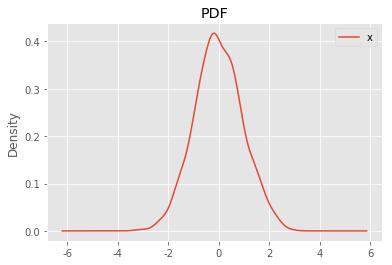

In [22]:
import pandas as pd
df = pd.DataFrame({'x':x})
df.plot(kind='kde',title='PDF')

In [23]:
print ('平均數',x.mean())
print ('標準差',x.std())
print ('最大值', x.mean() + 3 * x.std())
print ('最小值', x.mean() - 3 * x.std())
print ('超過最大值的異常值', df[df['x'] > x.mean() + 3 * x.std()])
print ('超過最小值的異常值', df[df['x'] < x.mean() - 3 * x.std()])

平均數 0.00114738355352
標準差 0.947099972921
最大值 2.84244730232
最小值 -2.84015253521
超過最大值的異常值            x
53  2.850382
超過最小值的異常值             x
89  -2.917515
401 -3.176499


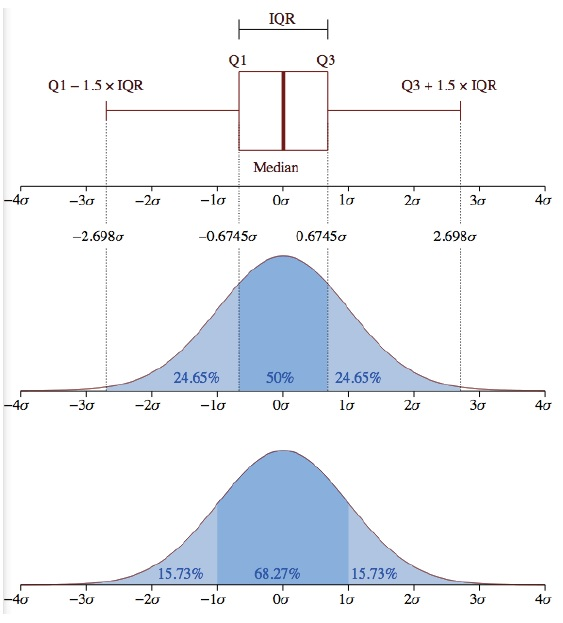

# 3. 相關性分析

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# 政府開放資料平台 - 不動產買賣實價登錄批次資料（http://data.gov.tw/node/6213）
df = pd.read_csv('A_LVR_LAND_A.csv', encoding='big5')
df[:10]

,建物移轉總面積平方公尺,建物現況格局-房,建物現況格局-廳,建物現況格局-衛,總價元
0,133.85,3,2,2,13600000
1,74.08,0,2,1,19700000
2,109.87,3,2,2,12550000
3,50.02,1,1,1,9800000
4,81.38,3,2,2,15800000
5,23.01,0,0,0,3150000
6,0.00,0,0,0,3322200
7,129.84,3,2,2,17000000
8,156.72,3,2,2,27230000
9,279.71,4,2,2,28200000


In [25]:
df.corr()

,建物移轉總面積平方公尺,建物現況格局-房,建物現況格局-廳,建物現況格局-衛,總價元
建物移轉總面積平方公尺,1.000000,0.195329,0.159584,0.303817,0.627678
建物現況格局-房,0.195329,1.000000,0.343025,0.503330,0.142180
建物現況格局-廳,0.159584,0.343025,1.000000,0.672597,0.089311
建物現況格局-衛,0.303817,0.503330,0.672597,1.000000,0.284548
總價元,0.627678,0.142180,0.089311,0.284548,1.000000


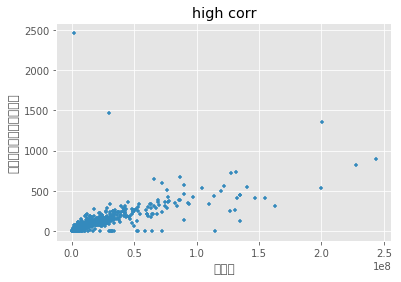

In [29]:
plt.rcParams['axes.unicode_minus']=False #正常顯示負號
df.plot(kind='scatter',title='high corr',figsize=(6,4),x='總價元',y='建物移轉總面積平方公尺',marker='+')

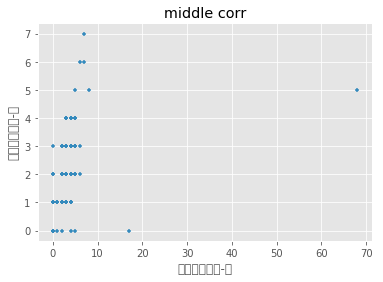

In [30]:
df.plot(kind='scatter',title='middle corr',figsize=(6,4),x='建物現況格局-房',y='建物現況格局-衛',marker='+')

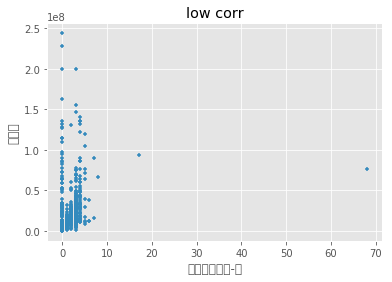

In [31]:
df.plot(kind='scatter',title='low corr',figsize=(6,4),x='建物現況格局-房',y='總價元',marker='+')

# 4. 時間序列處理

In [32]:
import pandas as pd
df = pd.read_csv("GlobalTemperatures.csv", encoding='big5')
df[:20]

,dt,LandAverageTemperature
0,1750-01-01,3.034
1,1750-02-01,3.083
2,1750-03-01,5.626
3,1750-04-01,8.490
4,1750-05-01,11.573
5,1750-06-01,12.937
6,1750-07-01,15.868
7,1750-08-01,14.750
8,1750-09-01,11.413
9,1750-10-01,6.367


In [33]:
df = df.set_index(df['dt'],drop=True)
del df['dt']
df.head()

,LandAverageTemperature
dt,
1750-01-01,3.034
1750-02-01,3.083
1750-03-01,5.626
1750-04-01,8.490
1750-05-01,11.573


In [34]:
df.index = pd.to_datetime(df.index,format='%Y-%m-%d')

In [35]:
type(df.index)

pandas.core.indexes.datetimes.DatetimeIndex

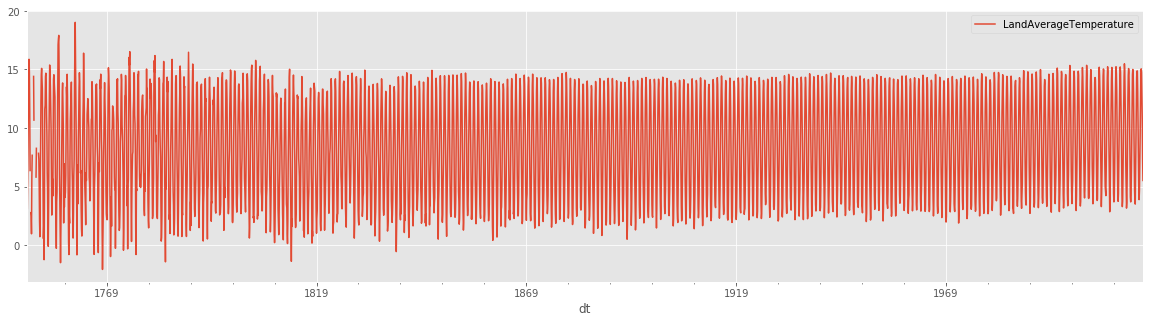

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

df.plot(kind='line',figsize=(20,5))

In [37]:
df2 = df.groupby(df.index.year).mean()
df2[:5]

,LandAverageTemperature
dt,
1750,8.719364
1751,7.976143
1752,5.779833
1753,8.388083
1754,8.469333


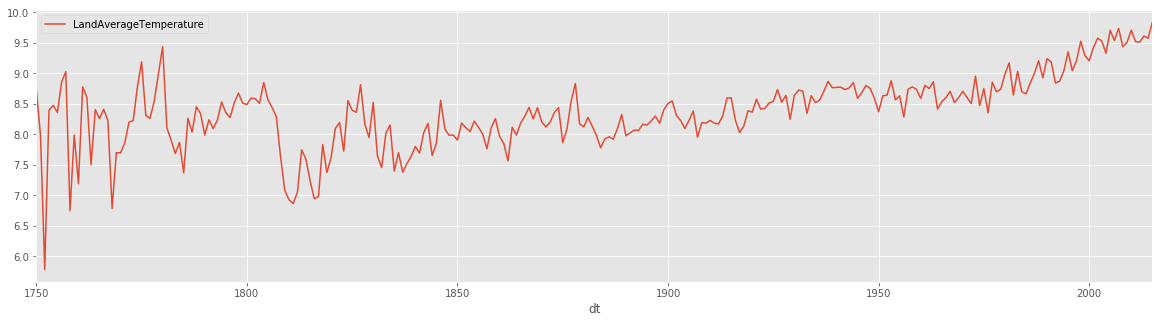

In [38]:
df2.plot(kind='line',figsize=(20,5))

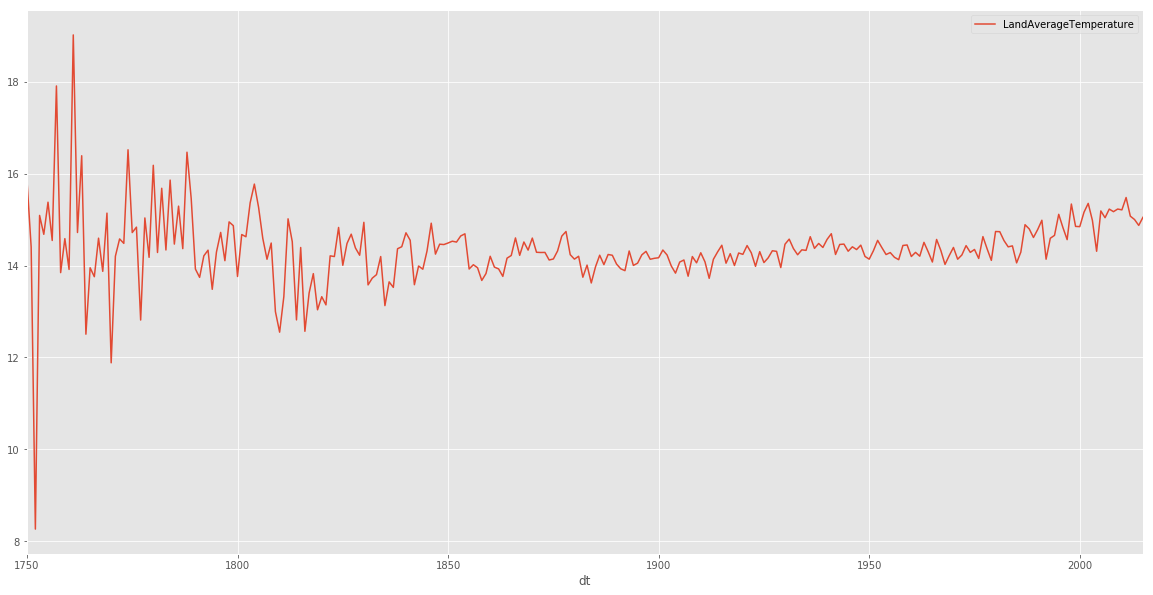

In [39]:
df_year_max = df.groupby(df.index.year).max()
df_year_max.plot(kind='line',figsize=(20,10))

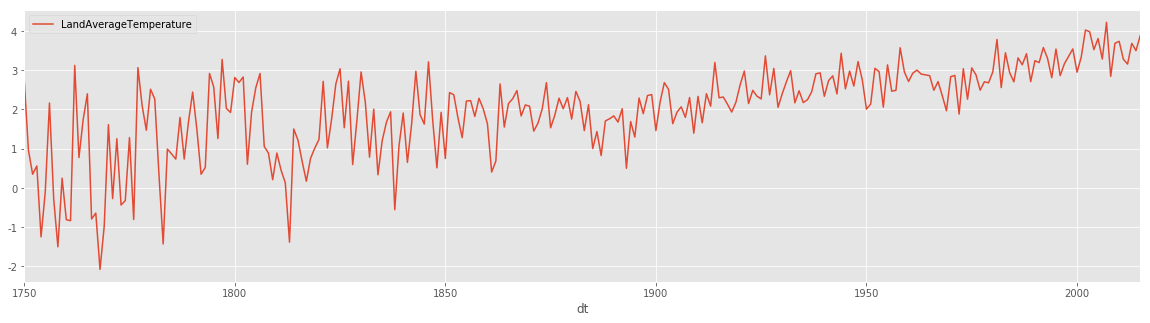

In [40]:
df_year_min = df.groupby(df.index.year).min()
df_year_min.plot(kind='line',figsize=(20,5))

In [42]:
df_Q = df.resample('Q-FEB').mean()
df_Q[df_Q.index.year > 2012]

,LandAverageTemperature
dt,
2013-02-28,4.003000
2013-05-31,9.166667
2013-08-31,14.771000
2013-11-30,10.278000
2014-02-28,3.985333
2014-05-31,9.516333
2014-08-31,14.694333
2014-11-30,10.044667
2015-02-28,4.465000


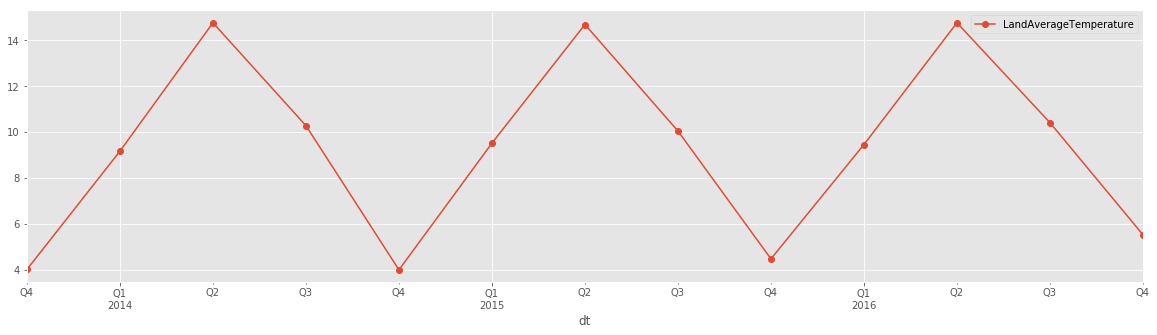

In [43]:
df_Q[df_Q.index.year > 2012].plot(kind='line',style='-o',figsize=(20,5))

In [44]:
df_M = df.resample('M').mean() #以月來切分
df_M[df_M.index.year > 2014]

,LandAverageTemperature
dt,
2015-01-31,3.881
2015-02-28,4.664
2015-03-31,6.740
2015-04-30,9.313
2015-05-31,12.312
2015-06-30,14.505
2015-07-31,15.051
2015-08-31,14.755
2015-09-30,12.999


# 5. 80/20法則

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

df = pd.DataFrame({'BookID':['B1','B2','B3','B4','B5','B6','B7','B8','B9','B10'],'Income':[1000,3000,30000,24000,300,400,800,2300,12000,1800]})
df = df.sort_values(by=['Income'],ascending=False).reset_index(drop=True)
df

,BookID,Income
0,B3,30000
1,B4,24000
2,B9,12000
3,B2,3000
4,B8,2300
5,B10,1800
6,B1,1000
7,B7,800
8,B6,400
9,B5,300


In [4]:
# 計算收入佔總收入百分比（累積）
p = []
for i in range(len(df)):
    x = df['Income'][i]/sum(df['Income'])
    if(i!=0):
        p.append(x+p[i-1])
    else:
        p.append(x)
p

[0.3968253968253968,
 0.71428571428571419,
 0.87301587301587291,
 0.91269841269841256,
 0.94312169312169303,
 0.96693121693121686,
 0.98015873015873012,
 0.9907407407407407,
 0.99603174603174605,
 1.0]

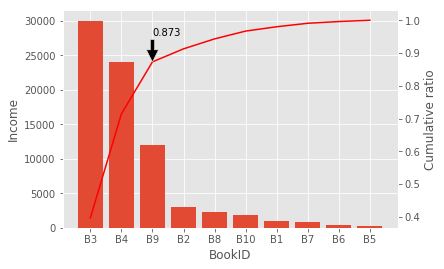

In [16]:
fig, ax1 = plt.subplots()
ax1.bar(df.index,df['Income'],align='center')
ax1.set_ylabel('Income')
ax1.set_xlabel('BookID')

# ax2共用ax1的x軸
ax2 = ax1.twinx()
ax2.plot(df.index, p, 'r-')
ax2.set_ylabel('Cumulative ratio')
ax2.grid(False)

#標註過80%的點
for i in range(len(p)):
    if(p[i]>0.8):
        ax2.annotate(round(p[i],3),xy=(df.index[i],p[i]),xytext=(df.index[i],p[i]+0.08), #xy=(箭頭指的點), xytext=(標註文字的位置)
                     arrowprops=dict(facecolor='black'))
        break

plt.xticks(df.index, df['BookID'])

plt.show()